In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange, tqdm
from edes.modules.detection.detection_utils import plot, plot_ax, big_plt_font

big_plt_font()
base_dir = '/home/electron/artiq/experiment/artiq-master/results/npz_results'

In [2]:
def V_to_P(V): 
    P = 10*np.log10(V**2/100*1000) 
    return P

def P_to_V(P): 
    V = np.sqrt(10**(P/10)/1000*100) 
    return V

In [10]:
def plot_single_avg_scan(data_filename, background_filename=None, 
                         display_indv=False, display_avg=True, show_noise=False, 
                         signal_label='Data', background_label=None):
    data_file = np.load(data_filename) 
    data_result = data_file['full_data'] 
    if background_filename is not None: 
        noise_file = np.load(background_filename) 
        noise_result = noise_file['full_data']
    else: 
        show_noise = False
    scan_min = data_file['scan_min'] #0.4 #0.25 
    scan_max = data_file['scan_max'] #0.57 #0.63 
    scan_stp = data_file['scan_stp'] #0.001
    cycle_time = data_file['cycle_time'] #1
    print(f'>>> Scanned from {scan_min}V to {scan_max}V with step {scan_stp}V and time {cycle_time}s/voltage level')
    sweep_time = int((scan_max-scan_min)/scan_stp)*cycle_time*1.2 
    data_time = int((scan_max-scan_min)/scan_stp)*cycle_time

    if display_indv:
        for data_arr in data_result:
    
            # Number of points in the trace
            num_points = len(data_arr)
            
            # Generate frequency axis in MHz
            time_start = 0 
            time_end = sweep_time
            time_axis = np.linspace(time_start, time_end, num_points)
            actual_index = np.where(time_axis < data_time)
            time_actual = time_axis[actual_index]
            data_actual = data_arr[actual_index] 
            voltage = np.linspace(scan_min, scan_max, len(data_actual))
            if show_noise:
                noise_floor = noise_result[-1]
                noise_actual = noise_floor[actual_index]
            
            # --- Plot ---
            plt.figure(figsize=(8,6))
            plot(voltage, data_actual, label=signal_label)
            if show_noise:
                plot(voltage, noise_actual, label=background_label)
            # plt.xlabel("Sweep time (s)") 
            plt.xlabel("RF source voltage (V)")
            plt.ylabel("Power (dBm)")
            plt.legend()
            plt.show()

    if display_avg:
        # Number of points in the trace
        data_arr = 10*np.log10(np.mean([10**(i/10) for i in data_result], axis=0))
        if show_noise:
            noise_floor = 10*np.log10(np.mean([10**(i/10) for i in noise_result], axis=0))
        num_points = len(data_arr)
        
        # Generate frequency axis in MHz
        time_start = 0 
        time_end = sweep_time
        time_axis = np.linspace(time_start, time_end, num_points)
        actual_index = np.where(time_axis < data_time)
        time_actual = time_axis[actual_index]
        data_actual = data_arr[actual_index] 
        if show_noise:
            noise_actual = noise_floor[actual_index]
        voltage = np.linspace(scan_min, scan_max, len(data_actual))
        
        # --- Plot ---
        plt.figure(figsize=(8,6))
        plot(voltage, data_actual, label=signal_label)
        if show_noise:
            plot(voltage, noise_actual, label=background_label)
        plt.xlabel("RF source voltage (V)")
        plt.ylabel("Power (dBm)")
        plt.legend()
        plt.show()

In [23]:
def plot_freq_scan(data_filename, noise_filename=None, show_noise=True, display_indv=True):
    data_file = np.load(data_filename) 
    all_data = data_file['full_data']
    freq_cen = data_file['freq_cen'] 
    span = data_file['span']
    P_list = data_file['PRS']
    if noise_filename is not None: 
        noise_file = np.load(noise_filename)
        all_noise = noise_file['full_data']
    else: 
        show_noise = False

    if not display_indv:
        fig, ax = plt.subplots()
    for i in range(len(all_data)):
        if display_indv: 
            fig, ax = plt.subplots()
        data = all_data[i]
        if show_noise: 
            noise = all_noise[i]
        f = np.linspace(freq_cen-span/2, freq_cen+span/2, len(data))
        plot_ax(ax, f, data, label=f'RS Pwr = {P_list[i]}dBm', xlabel='Frequency (MHz)', ylabel='Power (dBm)')
        if show_noise: 
            plot_ax(ax, f, noise, alpha=0.6, label=f'Background', xlabel='Frequency (MHz)', ylabel='Power (dBm)')
        ax.legend(bbox_to_anchor=(1, 1.05))

>>> Scanned from 0.42V to 0.46V with step 0.002V and time 3s/voltage level


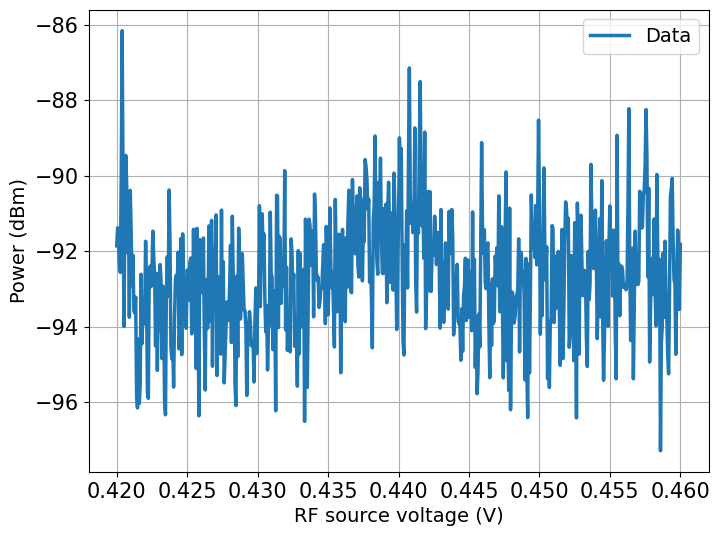

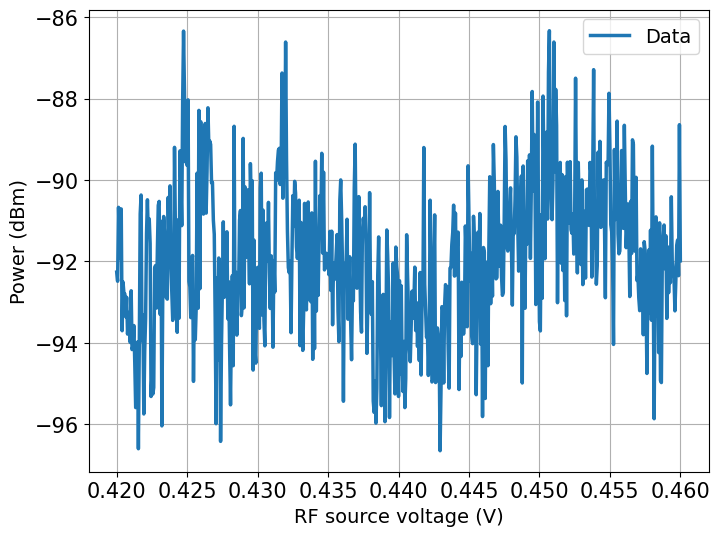

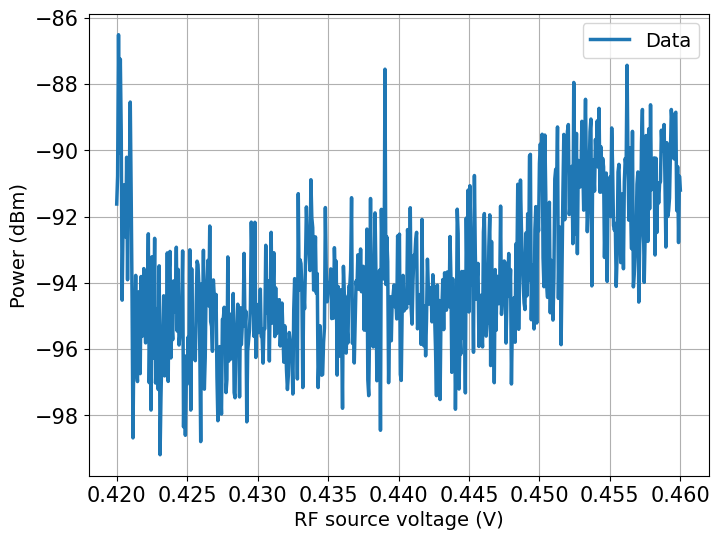

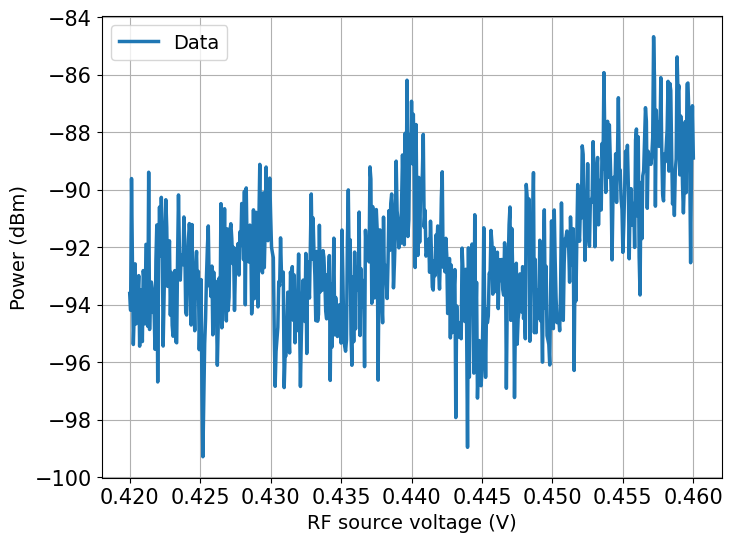

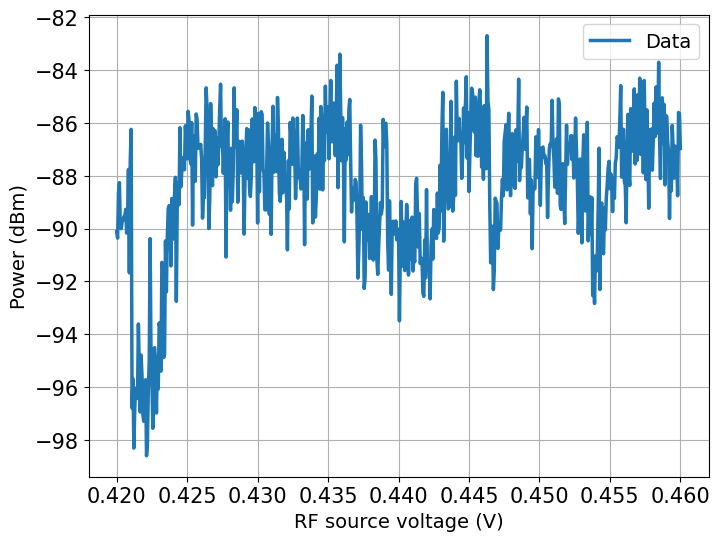

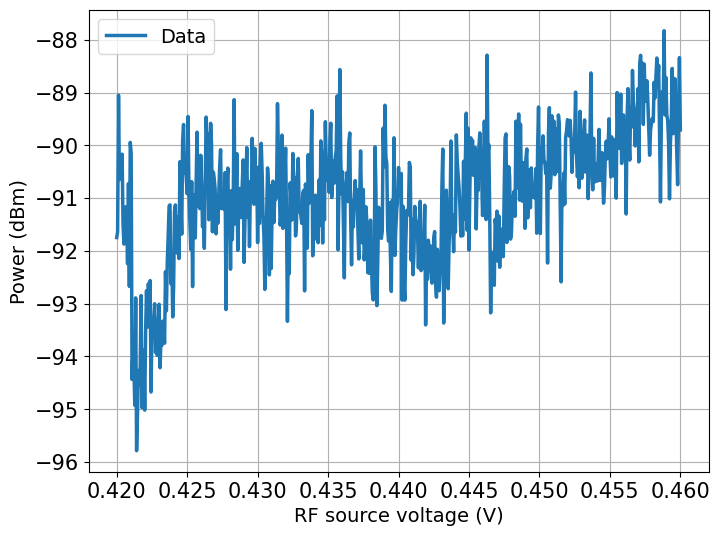

In [45]:
data_file = f"/home/electron/artiq/experiment/artiq-master/results/npz_results/result_2025-10-10 22:28:51.449428.npz"
noise_file = None
plot_single_avg_scan(data_file, noise_file, display_indv=True)

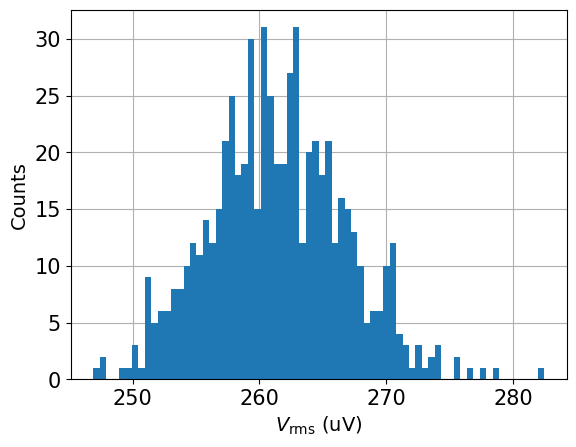

In [139]:
plt.hist(np.sqrt(10**(data_actual/10)*50)*1e6,bins=70,zorder=2)#, histtype='step', lw=2)
plt.xlabel(r'$V_{\rm{rms}}$ (uV)') 
plt.ylabel('Counts') 
plt.grid()
plt.show()

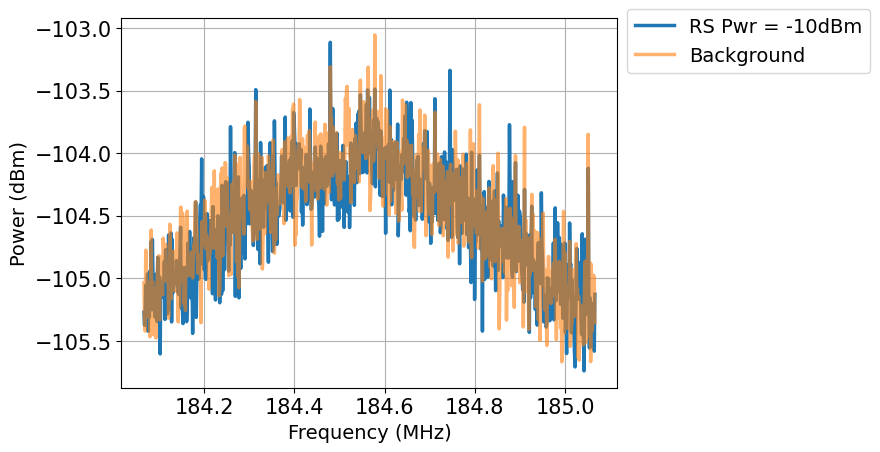

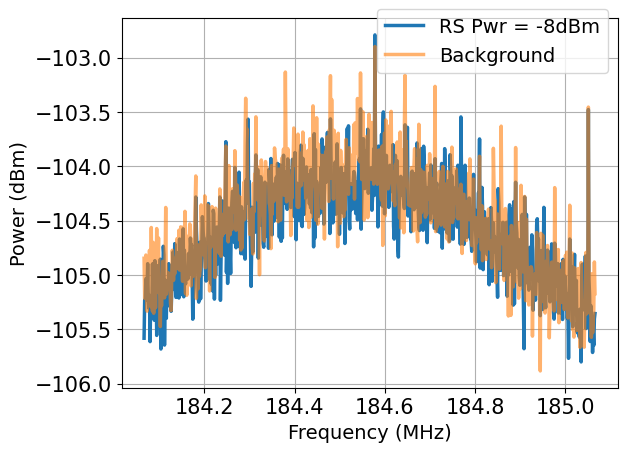

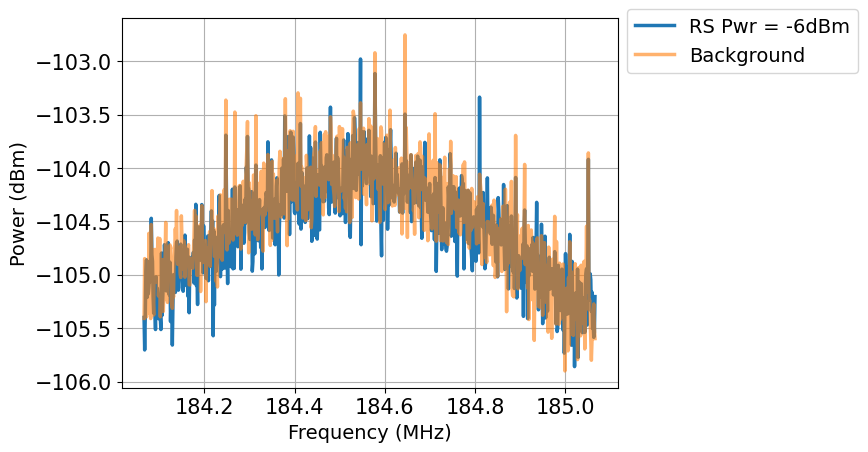

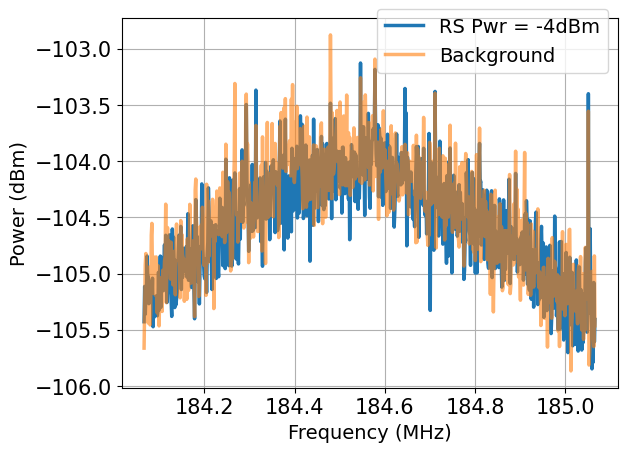

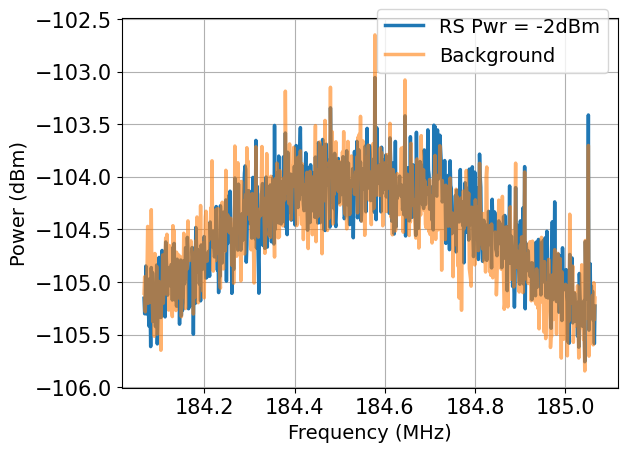

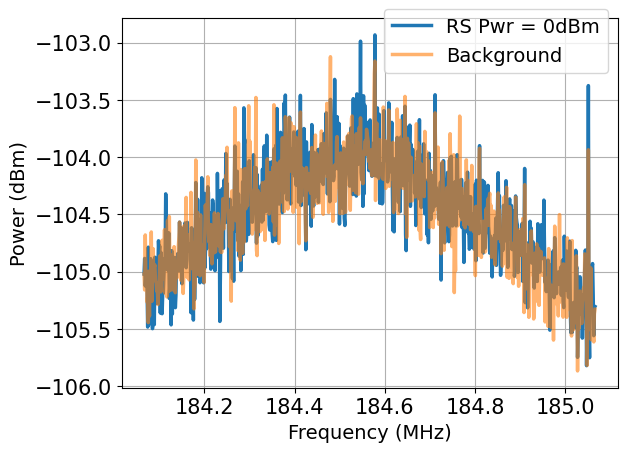

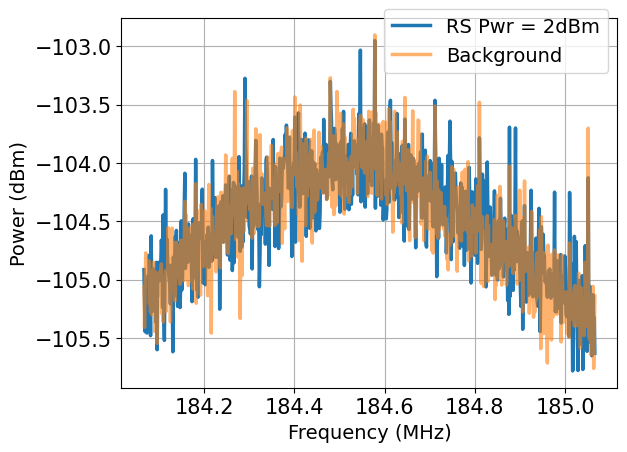

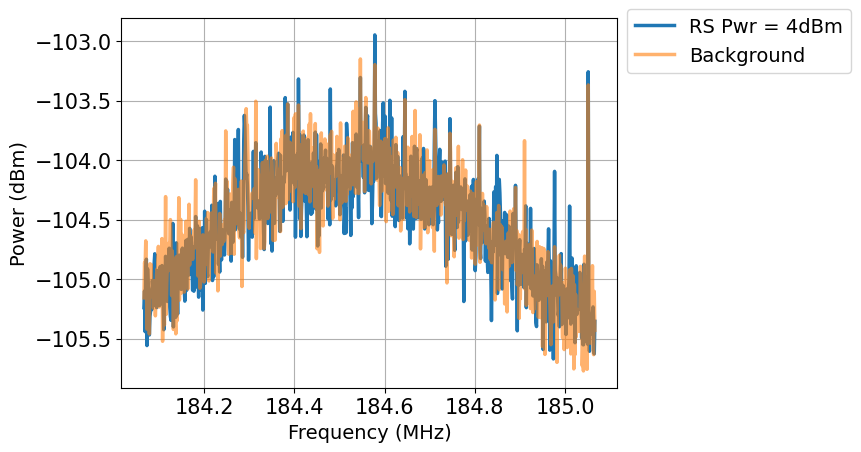

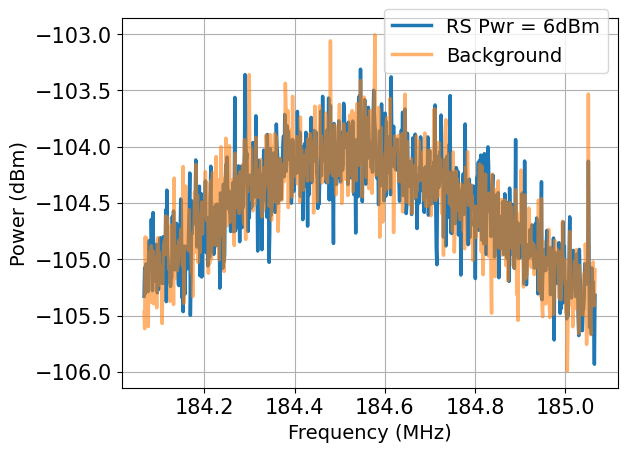

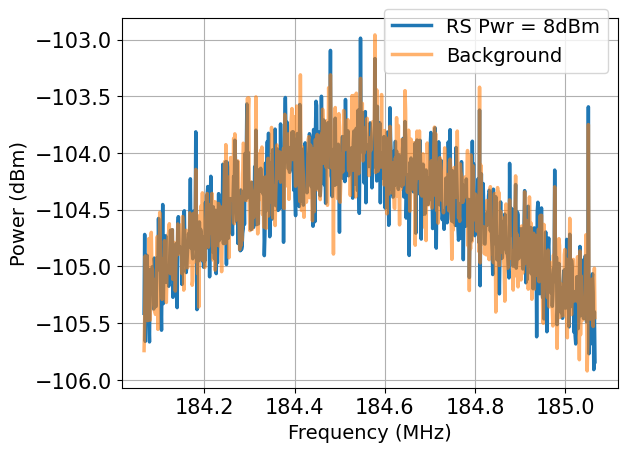

In [24]:
data_file = '/home/electron/artiq/experiment/artiq-master/results/npz_results/result_2025-10-04 00:53:02.367848.npz' 
noise_file = '/home/electron/artiq/experiment/artiq-master/results/npz_results/result_2025-10-04 01:11:02.362150.npz'
plot_freq_scan(data_file, noise_file, show_noise=True)

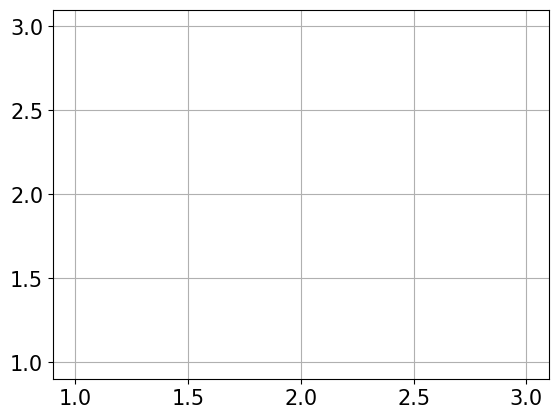

In [32]:
plot([[1,2,3]], [[1,2,3]])

In [35]:
184.394192*2/359*0.21

0.21572579565459613

In [38]:
184.394192*2*0.2155/400

0.19868474188000002

In [40]:
all(np.ones(1)>0)

True